**Problem 2: Training a CNN using CIFAR-10 Data**

Q1.Warm-up: Load the dataset and check how the images look like

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompletePTVBC0/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompletePTVBC0/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


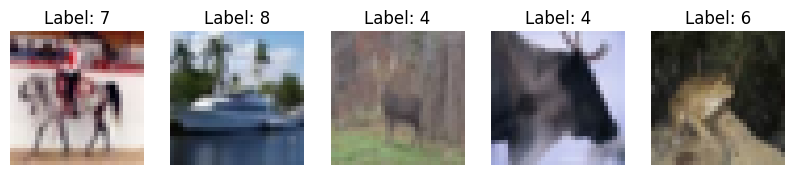

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

#Loading dataset
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

#Showing images with labels
def show_images(ds, num_images=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(ds.take(num_images)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f'Label: {label.numpy()}')
        plt.axis('off')
    plt.show()


show_images(ds_train)

We can see the different images displayed after the data set has been laoded

**Q2. Train a CNN with three hidden convolutional layers that use the ReLU activation**
**function. Use 64 11×11 filters for the first layer, followed by 2×2 max pooling**
**(stride of 2). The next two convolutional layers will use 128 3×3 filters followed by**
**the ReLU activation function. Prior to the softmax layer, you should have an**
**average pooling layer that pools across the preceding feature map. Do not use**
**a pre-trained CNN. Train your model using all of the CIFAR-10 training data,**
**and evaluate your trained system on the CIFAR-10 test data. Display the training loss**
**as a function of epochs. What is the accuracy on the test data? How did you**
**initialize the weights? Discuss your architecture and hyper-parameters**

Epoch 1/10
782/782 [==============================] - 225s 286ms/step - loss: 1.8701 - accuracy: 0.3020 - val_loss: 1.7393 - val_accuracy: 0.3654
Epoch 2/10
782/782 [==============================] - 215s 275ms/step - loss: 1.6055 - accuracy: 0.4156 - val_loss: 1.5333 - val_accuracy: 0.4399
Epoch 3/10
782/782 [==============================] - 215s 275ms/step - loss: 1.4831 - accuracy: 0.4630 - val_loss: 1.4320 - val_accuracy: 0.4824
Epoch 4/10
782/782 [==============================] - 215s 276ms/step - loss: 1.4011 - accuracy: 0.4961 - val_loss: 1.3777 - val_accuracy: 0.5074
Epoch 5/10
782/782 [==============================] - 215s 276ms/step - loss: 1.3385 - accuracy: 0.5206 - val_loss: 1.3307 - val_accuracy: 0.5263
Epoch 6/10
782/782 [==============================] - 206s 263ms/step - loss: 1.2840 - accuracy: 0.5417 - val_loss: 1.2813 - val_accuracy: 0.5423
Epoch 7/10
782/782 [==============================] - 206s 263ms/step - loss: 1.2339 - accuracy: 0.5603 - val_loss: 1.2403 -

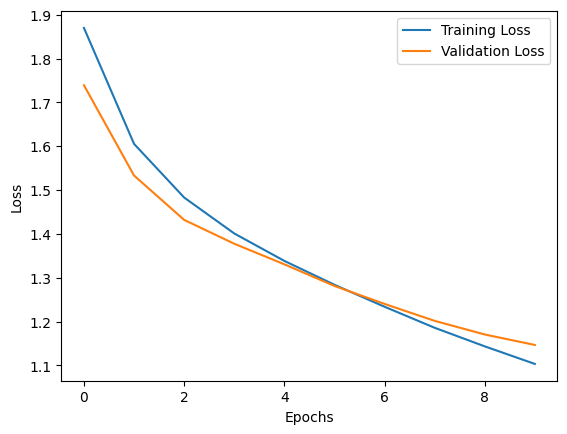

157/157 [==============================] - 12s 76ms/step - loss: 1.1467 - accuracy: 0.6008
Test Loss: 1.146650791168213
Test Accuracy: 0.6007999777793884


In [ ]:
#We defined the architecture for CNN, prepared the data and evaluated the model that was trained
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

#CNN  model creation and compilation
model = models.Sequential([
    layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Loading data
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

#Processing data
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(64)
ds_test = ds_test.map(preprocess).batch(64)

#Model training
history = model.fit(ds_train,
                    epochs=10,
                    validation_data=ds_test)

#Training loss and validation loss plotting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Finding the accuracy and loss of the model.
test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


#Our architecture consists of three convolutional layers, max pooling, softmax output layer. The model is trained for 10 epochs and training loss is plotted and also accuracy is calculated.

Visualize all of the 11×11×3 filters learned by the first convolutional layer as an
RGB image array (I suggest making a large RGB image that is made up of each
of the smaller images, so it will have 4 rows and 16 columns). Note that you will
need to normalize each filter by contrast stretching to do this visualization, i.e.,
for each filter subtract the smallest value and then divide by the new largest value.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteJL77J0/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteJL77J0/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Epoch 1/10
782/782 [==============================] - 251s 319ms/step - loss: 1.4570 - accuracy: 0.4739 - val_loss: 1.7833 - val_accuracy: 0.3907
Epoch 2/10
782/782 [==============================] - 230s 294ms/step - loss: 1.1502 - accuracy: 0.5913 - val_loss: 2.4524 - val_accuracy: 0.3035
Epoch 3/10
782/782 [==============================] - 242s 310ms/step - loss: 1.0185 - accuracy: 0.6407 - val_loss: 2.5912 - val_accuracy: 0.3396
Epoch 4/10
782/782 [==============================] - 241s 309ms/step - loss: 0.9264 - accuracy: 0.6724 - val_loss: 1.7000 - val_accuracy: 0.4975
Epoch 5/10
782/782 [==============================] - 233s 298ms/step - loss: 0.8548 - accuracy: 0.6978 - val_loss: 1.2868 - val_accuracy: 0.5737
Epoch 6/10
782/782 [==============================] - 234s 299ms/step - loss: 0.7964 - accuracy: 0.7206 - val_loss: 1.2886 - val_accuracy: 0.5788
E

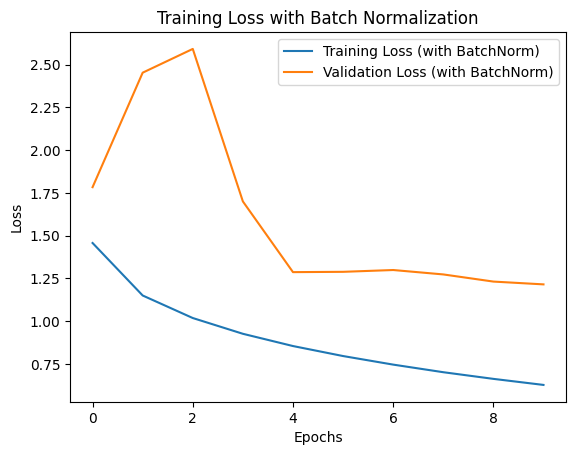

157/157 [==============================] - 13s 81ms/step - loss: 1.2152 - accuracy: 0.6090
Test Loss with BatchNorm: 1.2152323722839355
Test Accuracy with BatchNorm: 0.609000027179718


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

#Normalization
model_with_batchnorm = models.Sequential([
    layers.Conv2D(64, (11, 11), input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

#Model
model_with_batchnorm.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])


(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

#Batching data
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(64)
ds_test = ds_test.map(preprocess).batch(64)

#Model training and plotting loss
history_with_batchnorm = model_with_batchnorm.fit(ds_train,
                                                  epochs=10,
                                                  validation_data=ds_test)


plt.plot(history_with_batchnorm.history['loss'], label='Training Loss (with BatchNorm)')
plt.plot(history_with_batchnorm.history['val_loss'], label='Validation Loss (with BatchNorm)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss with Batch Normalization')
plt.show()

#Model evaluation
test_loss_with_batchnorm, test_accuracy_with_batchnorm = model_with_batchnorm.evaluate(ds_test)
print(f'Test Loss with BatchNorm: {test_loss_with_batchnorm}')
print(f'Test Accuracy with BatchNorm: {test_accuracy_with_batchnorm}')


## Problem 3
#### 1. Vanilla GAN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and prepare the Fashion MNIST data
(x_train, _), (_, _) = keras.datasets.fashion_mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize the images to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension

In [ ]:
batch_size = 256
buffer_size = 60000

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size).batch(batch_size)

# Generator model
def build_generator():
    model = keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(100,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(28 * 28 * 1, activation="tanh"), # output layer for the generator should be ReLU
        layers.Reshape((28, 28, 1))
    ])
    return model

# Discriminator model
def build_discriminator():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid") # output layer for the discriminator should be sigmoid
    ])
    return model

# Build the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

In [ ]:
# Define loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Seed for generating consistent images
seed = tf.random.normal([16, 100])

# Training function
def train_step(images):
    noise = tf.random.normal([batch_size, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss

# Training and image saving
def train(dataset, epochs):
    g_loss, d_loss = [], []
    for epoch in range(epochs):
        for image_batch in dataset:
            loss_g, loss_d = train_step(image_batch)

        g_loss.append(loss_g)
        d_loss.append(loss_d)

        # Produce images to visualize the progress
        if epoch == 0 or epoch == epochs // 2 or epoch == epochs - 1:
            generate_and_save_images(generator, epoch + 1, seed)

    # Plot losses
    plt.figure(figsize=(10, 5))
    plt.plot(g_loss, label='Generator Loss')
    plt.plot(d_loss, label='Discriminator Loss')
    plt.title('Training Losses')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Image generation and saving
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(10, 10))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

# Prepare the dataset
(train_images, _), (_, _) = keras.datasets.fashion_mnist.load_data()
train_images = (train_images - 127.5) / 127.5
train_images = np.expand_dims(train_images, -1)
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(256) # batch size = 256

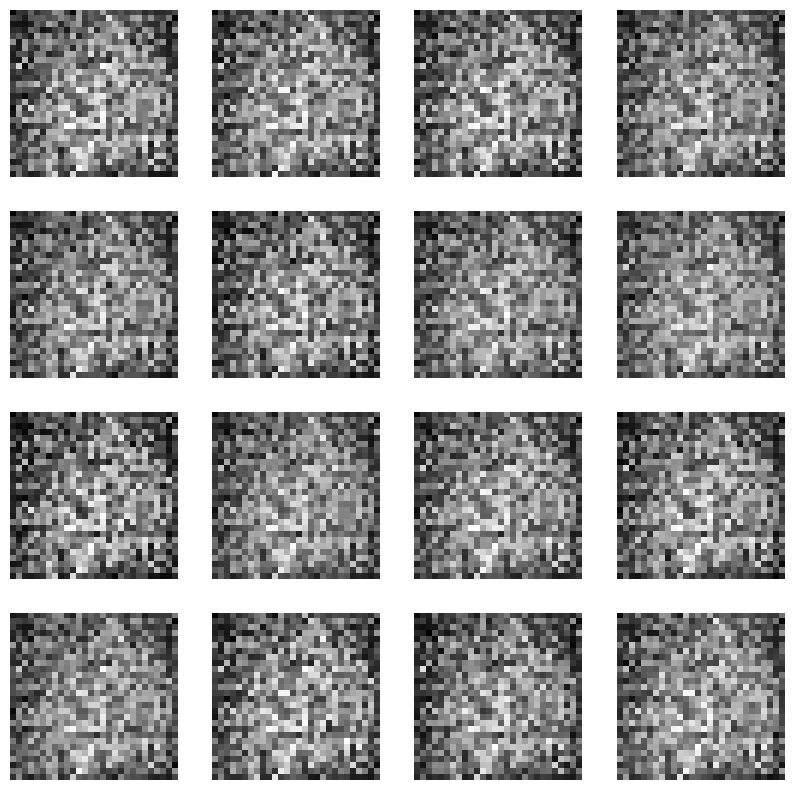

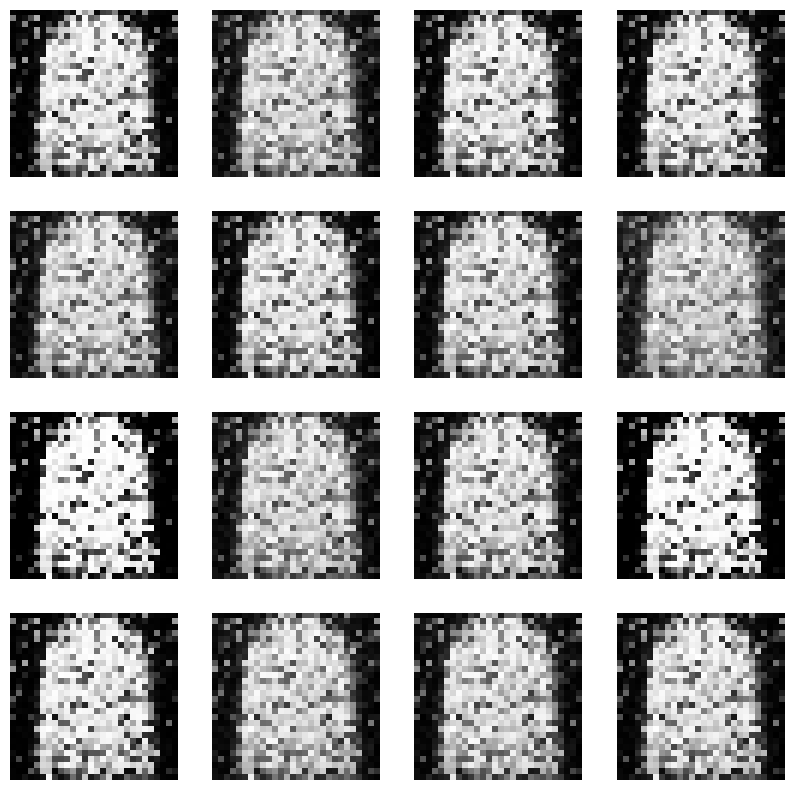

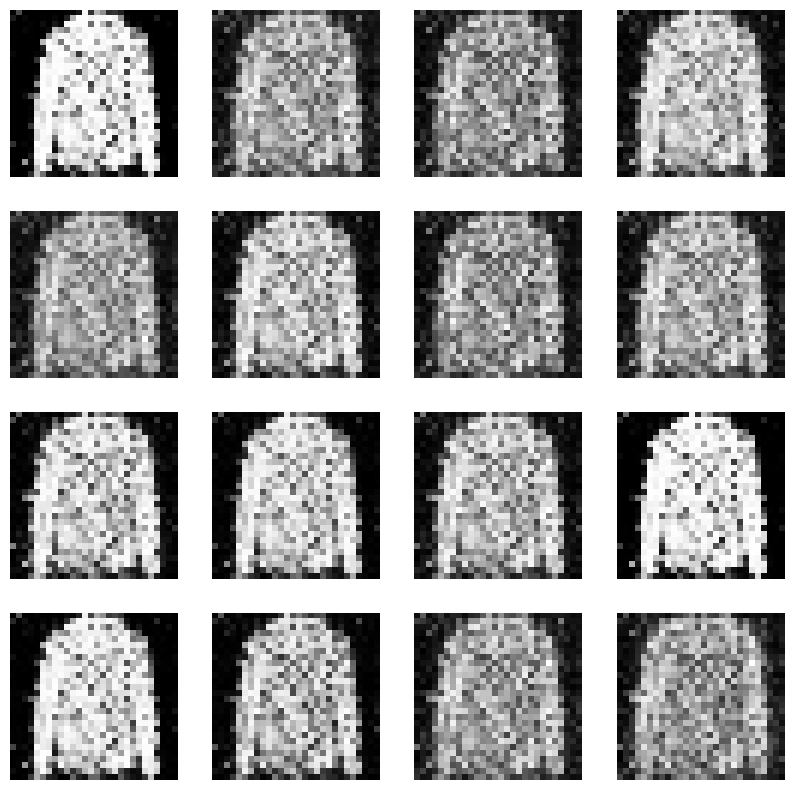

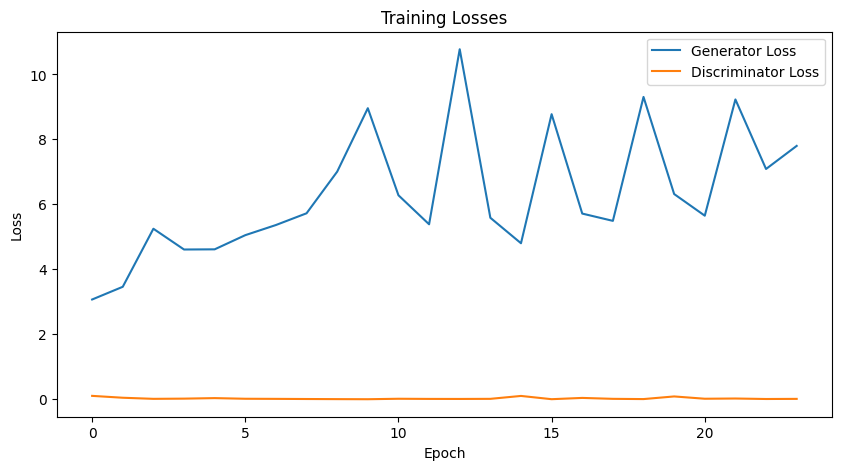

In [ ]:
# Generate the images
train(train_dataset, 24)

Discriminator Loss (Orange Line):

The discriminator loss is relatively low and stable throughout the training process. This indicates that the discriminator is quite successful at distinguishing real images from the fake images generated by the generator.

Generator Loss (Blue Line):

The generator loss shows more fluctuation and is generally higher compared to the discriminator loss. There are noticeable peaks and troughs, suggesting some instability in the generator's training process.

# part 2 :


Epoch 1/5
235/235 [==============================] - 7s 25ms/step - loss: 0.4987 - accuracy: 0.8185 - val_loss: 0.4322 - val_accuracy: 0.8431
Epoch 2/5
235/235 [==============================] - 7s 28ms/step - loss: 0.3603 - accuracy: 0.8674 - val_loss: 0.3813 - val_accuracy: 0.8595
Epoch 3/5
235/235 [==============================] - 6s 24ms/step - loss: 0.3204 - accuracy: 0.8815 - val_loss: 0.3569 - val_accuracy: 0.8705
Epoch 4/5
235/235 [==============================] - 7s 30ms/step - loss: 0.2965 - accuracy: 0.8898 - val_loss: 0.3520 - val_accuracy: 0.8735
Epoch 5/5
94/94 [==============================] - 0s 3ms/step


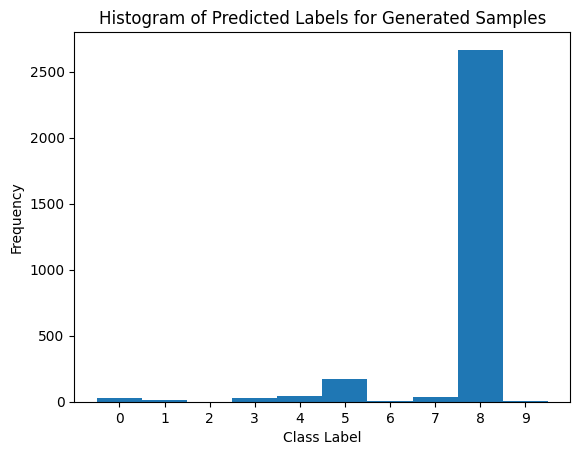

94/94 [==============================] - 0s 4ms/step


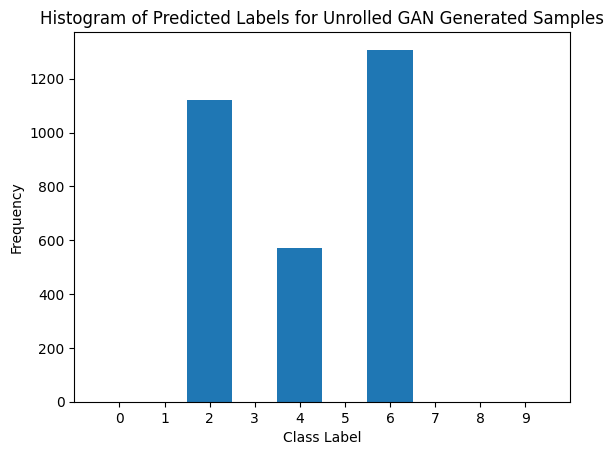

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# the batch size
batch = 256

# load data
(x_train, _), (_, _) = keras.datasets.fashion_mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

# batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(batch)

# build model
def build_generator():
    model = keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(100,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(28 * 28 * 1, activation="tanh"),
        layers.Reshape((28, 28, 1))
    ])
    return model

# discriminator model
def build_classifier():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")  # change the output to be 10
    ])
    return model

generator = build_generator()
classifier = build_classifier()
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = (train_images.astype(np.float32) - 127.5) / 127.5
train_images = np.expand_dims(train_images, axis=-1)
test_images = (test_images.astype(np.float32) - 127.5) / 127.5
test_images = np.expand_dims(test_images, axis=-1)

classifier.fit(train_images, train_labels, epochs=5, batch_size=batch, validation_data=(test_images, test_labels))

# evaluate
classifier.evaluate(test_images, test_labels)

# set 3000 samples
noise = tf.random.normal([3000, 100])
generated_images = generator(noise, training=False)

# predict the class labels
predicted_labels = classifier.predict(generated_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# histogram of predicted labels
plt.hist(predicted_labels, bins=range(11), align='left')
plt.xticks(range(10))
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels for Generated Samples')
plt.show()

# define legacy optimizers
import tensorflow.keras.optimizers.legacy as legacy_optimizers
generator_optimizer = legacy_optimizers.Adam(1e-4)
discriminator_optimizer = legacy_optimizers.Adam(1e-4)

# train unrolled GAN
def train_unrolled_gan(dataset, epochs, k):
    for epoch in range(epochs):
        for image_batch in dataset:
            # train D
            noise = tf.random.normal([batch, 100])
            with tf.GradientTape() as disc_tape:
                generated_images = generator(noise, training=True)
                real_output = discriminator(image_batch, training=True)
                fake_output = discriminator(generated_images, training=True)
                disc_loss = cross_entropy(tf.ones_like(real_output), real_output) + \
                            cross_entropy(tf.zeros_like(fake_output), fake_output)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

            # D_unroll
            D_unroll = keras.models.clone_model(discriminator)
            D_unroll.set_weights(discriminator.get_weights())
            unroll_discriminator_optimizer = legacy_optimizers.Adam(1e-4)

            # train D_unroll for k steps
            for _ in range(k):
                noise = tf.random.normal([batch, 100])
                with tf.GradientTape() as disc_tape:
                    generated_images = generator(noise, training=True)
                    real_output = D_unroll(image_batch, training=True)
                    fake_output = D_unroll(generated_images, training=True)
                    disc_loss = cross_entropy(tf.ones_like(real_output), real_output) + \
                                cross_entropy(tf.zeros_like(fake_output), fake_output)
                gradients_of_discriminator = disc_tape.gradient(disc_loss, D_unroll.trainable_variables)
                unroll_discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, D_unroll.trainable_variables))

            # train G
            noise = tf.random.normal([batch, 100])
            with tf.GradientTape() as gen_tape:
                generated_images = generator(noise, training=True)
                fake_output = D_unroll(generated_images, training=True)
                gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

# the cross entropy loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

discriminator = build_classifier()
discriminator.compile(optimizer=discriminator_optimizer, loss=cross_entropy)

# Train the unrolled GAN
train_unrolled_gan(train_dataset, epochs=24, k=5)

# set 3000 samples for the unrolled GAN
generated_images_unrolled = generator(tf.random.normal([3000, 100]), training=False)

# predict the class labels of the unrolled GAN
predicted_labels_unrolled = classifier.predict(generated_images_unrolled)
predicted_labels_unrolled = np.argmax(predicted_labels_unrolled, axis=1)

# histogram of predicted labels for unrolled GAN
plt.hist(predicted_labels_unrolled, bins=range(11), align='left')
plt.xticks(range(10))
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels for Unrolled GAN Generated Samples')
plt.show()


Vanilla GAN:
In the first histogram for the vanilla GAN, most of the generated samples are predicted as belonging to a single class (class 8). This indicates a severe mode collapse problem where the generator has learned to produce only a very limited variety of outputs, corresponding to one mode of the data distribution.

Unrolled GAN:
In the second histogram for the unrolled GAN, the distribution of predicted labels is more diverse. Although it is still not perfectly uniform, the samples are spread across multiple classes (class 2, class 3, class 4, and class 6), which is better than Vanilla GAN. The unrolled GAN has managed to capture more modes of the data distribution compared to the vanilla GAN.
